In [1]:
import pandas as pd


In [2]:
# Paths
data_folder = input()
TRAIN_PATH = data_folder + '/train.csv'
TEST_PATH = data_folder + '/test.csv'
SAMPLE_SUBMISSION_PATH = data_folder + '/sample_submission.csv'



In [78]:
train_df = pd.read_csv(TRAIN_PATH)


timestamp = pd.to_datetime(train_df['timestamp'], unit='s')
time_diff = timestamp.diff().dt.total_seconds()
time_gaps = time_diff[time_diff > 60]  # Assuming a gap is more than 60 seconds
print(time_gaps)

spearman_corr = train_df.corr(method='spearman')

# Create a lagged version of the dataframe
lagged_df = train_df.shift(1)
lagged2_df = train_df.shift(2)
lagged3_df = train_df.shift(3)
lagged4_df = train_df.shift(4)

correlation_matrix1 = pd.DataFrame(index=train_df.columns, columns=lagged_df.columns)
for col1 in train_df.columns:
    for col2 in lagged_df.columns:
        correlation_matrix1.loc[col1, col2] = train_df[col1].corr(lagged_df[col2], method='spearman')
correlation_matrix1 = correlation_matrix1.astype(float)


correlation_matrix2 = pd.DataFrame(index=train_df.columns, columns=lagged2_df.columns)
for col1 in train_df.columns:
    for col2 in lagged2_df.columns:
        correlation_matrix2.loc[col1, col2] = train_df[col1].corr(lagged2_df[col2], method='spearman')
correlation_matrix2 = correlation_matrix2.astype(float)

correlation_matrix3 = pd.DataFrame(index=train_df.columns, columns=lagged3_df.columns)        
for col1 in train_df.columns:
    for col2 in lagged3_df.columns:
        correlation_matrix3.loc[col1, col2] = train_df[col1].corr(lagged3_df[col2], method='spearman')
correlation_matrix3 = correlation_matrix3.astype(float)

correlation_matrix4 = pd.DataFrame(index=train_df.columns, columns=lagged4_df.columns)
for col1 in train_df.columns:
    for col2 in lagged4_df.columns:
        correlation_matrix4.loc[col1, col2] = train_df[col1].corr(lagged4_df[col2], method='spearman')
correlation_matrix4 = correlation_matrix4.astype(float)



Series([], Name: timestamp, dtype: float64)


In [4]:
correlation_matrix

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
timestamp,1.000000,0.410329,0.410488,0.410189,0.410342,0.588124,0.648500,0.670274,0.547871,0.618042,0.005467
open,0.410331,0.999994,0.999995,0.999996,0.999999,0.373114,0.596132,0.518810,0.372136,0.586366,-0.005943
high,0.410490,0.999989,0.999995,0.999987,0.999995,0.373882,0.596806,0.519523,0.372881,0.587025,-0.004989
low,0.410190,0.999989,0.999987,0.999994,0.999995,0.372368,0.595479,0.518114,0.371423,0.585739,-0.005074
close,0.410343,0.999988,0.999990,0.999990,0.999994,0.373142,0.596158,0.518836,0.372174,0.586402,-0.004244
volume,0.588123,0.373147,0.373896,0.372399,0.373155,0.797776,0.793049,0.803597,0.762592,0.766859,0.018888
quote_asset_volume,0.648500,0.596163,0.596819,0.595510,0.596171,0.792789,0.855392,0.841673,0.761289,0.829125,0.015010
number_of_trades,0.670273,0.518839,0.519545,0.518130,0.518847,0.806772,0.844671,0.896431,0.772890,0.818375,0.019657
taker_buy_base_volume,0.547870,0.371920,0.372641,0.371177,0.371920,0.765195,0.763532,0.772537,0.741404,0.747259,0.124955
taker_buy_quote_volume,0.618041,0.586178,0.586816,0.585528,0.586184,0.768739,0.830768,0.817783,0.747048,0.813581,0.103895


In [5]:

# Shift the 'close' column by one to get the next timestamp's closing price
shifted_close = train_df['close'].shift(-1)

diff_df = pd.DataFrame()
# Calculate the differences
diff_df['high_low_diff'] = train_df['high'] - train_df['low']
diff_df['open_close_diff'] = train_df['close'] - train_df['open']
diff_df['open_high_diff'] = train_df['high'] - train_df['open']
diff_df['open_low_diff'] = train_df['low'] - train_df['open']
growth_factors = train_df['close'] / train_df['open']
lagged_growth_factors = train_df['close'] / shifted_close


# Get the max and min differences
max_open_close_diff = diff_df['open_close_diff'].max()
min_open_close_diff = diff_df['open_close_diff'].min()

max_open_high_diff = diff_df['open_high_diff'].max()
min_open_high_diff = diff_df['open_high_diff'].min()

max_open_low_diff = diff_df['open_low_diff'].max()
min_open_low_diff = diff_df['open_low_diff'].min()

max_high_low_diff = diff_df['high_low_diff'].max()
min_high_low_diff = diff_df['high_low_diff'].min()

max_growth_factor = growth_factors.max()
min_growth_factor = growth_factors.min()

max_lagged_growth_factor = lagged_growth_factors.max()
min_lagged_growth_factor = lagged_growth_factors.min()

print(f"Max difference between opening and closing: {max_open_close_diff}")
print(f"Min difference between opening and closing: {min_open_close_diff}")

print(f"Max difference between opening and high: {max_open_high_diff}")
print(f"Min difference between opening and high: {min_open_high_diff}")

print(f"Max difference between opening and low: {max_open_low_diff}")
print(f"Min difference between opening and low: {min_open_low_diff}")

print(f"Max difference between high and low: {max_high_low_diff}")
print(f"Min difference between high and low: {min_high_low_diff}")

print(f"Max growth factor: {max_growth_factor}")
print(f"Min growth factor: {min_growth_factor}")

print(f"Max lagged growth factor: {max_lagged_growth_factor}")
print(f"Min lagged growth factor: {min_lagged_growth_factor}")

Max difference between opening and closing: 0.11450000000000005
Min difference between opening and closing: -0.10240000000000005
Max difference between opening and high: 0.13850000000000007
Min difference between opening and high: 0.0
Max difference between opening and low: 0.0
Min difference between opening and low: -0.14484999999999992
Max difference between high and low: 0.14659
Min difference between high and low: 0.0
Max growth factor: 1.1298922291548497
Min growth factor: 0.8467806358843266
Max lagged growth factor: 1.1806603773584905
Min lagged growth factor: 0.8809236947791165


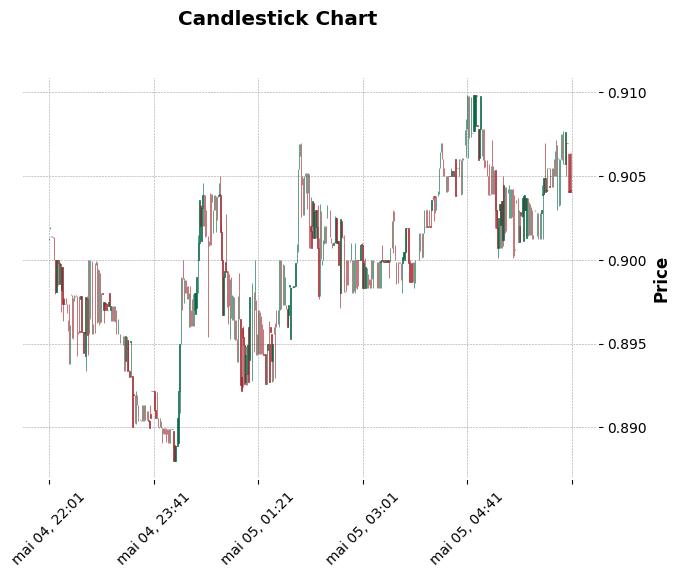

In [61]:
import mplfinance as mpf

# Create a copy of the train_df
ohlcv_df  = train_df.copy()

# Convert the timestamp to datetime if not already done
ohlcv_df ['timestamp'] = pd.to_datetime(ohlcv_df ['timestamp'], unit='s')

# Set the timestamp as the index
ohlcv_df .set_index('timestamp', inplace=True)

# Select the required columns for the candlestick chart
#ohlcv_df = ohlcv_df[['open', 'high', 'low', 'close', 'volume']]

# Plot the candlestick chart
mpf.plot(ohlcv_df[:500], type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

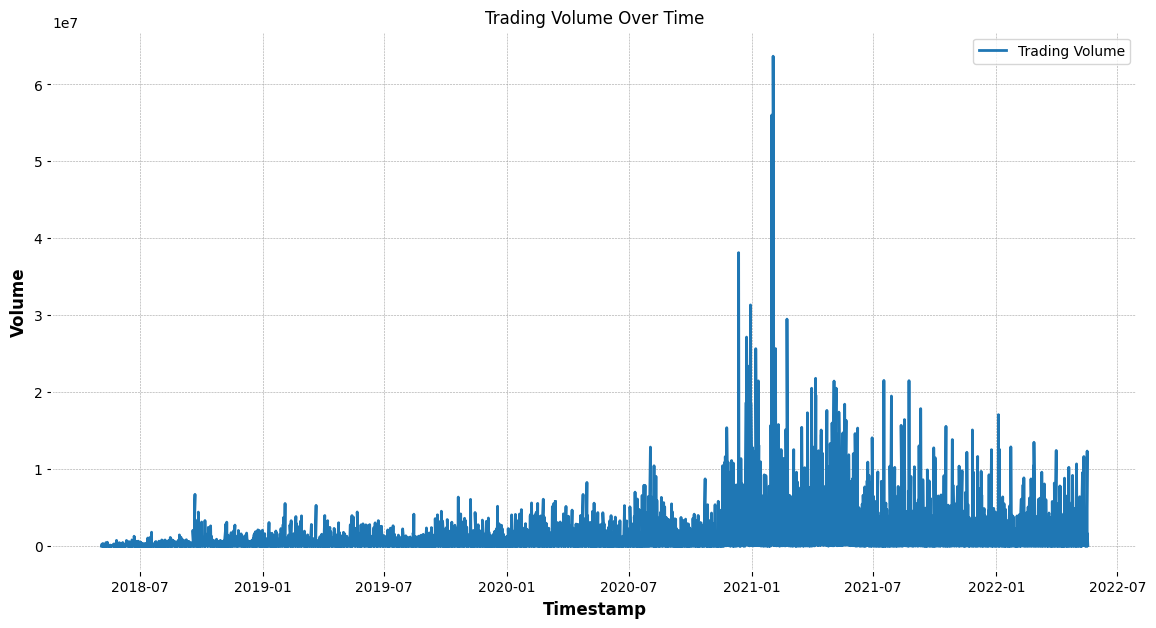

In [7]:
import matplotlib.pyplot as plt


# Plot the trading volume
plt.figure(figsize=(14, 7))
plt.plot(ohlcv_df.index, ohlcv_df['volume'], label='Trading Volume')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

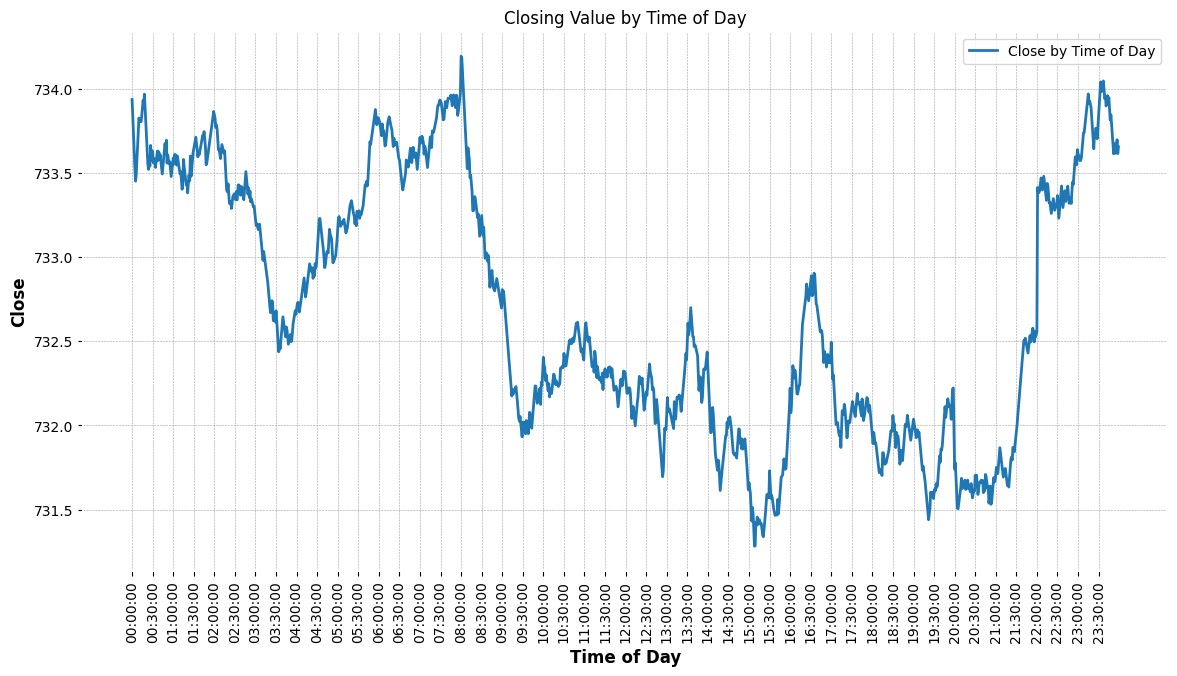

In [84]:
# Extract the time of day from the timestamp
ohlcv_df['time_of_day'] = ohlcv_df.index.time

# Group by the time of day and sum the closes
close_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['close'].sum()

plt.figure(figsize=(14, 7))
plt.plot(close_by_time_of_day.index, close_by_time_of_day.values, label='Close by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Close')
plt.title('Closing Value by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.xticks(ticks=range(0, len(close_by_time_of_day), 30), labels=close_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()



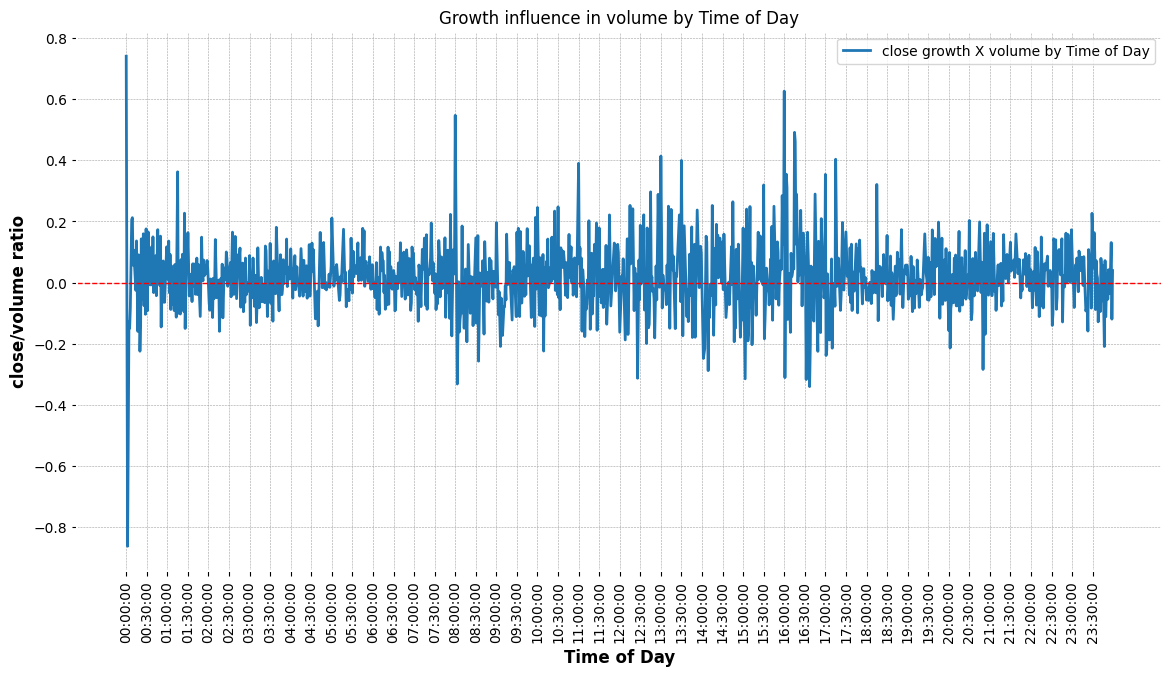

In [115]:


# Extract the time of day from the timestamp
ohlcv_df['time_of_day'] = ohlcv_df.index.time

# Group by the time of day and sum the volumes
volume_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['volume'].sum()
volume_by_time_of_day_normalized = volume_by_time_of_day / volume_by_time_of_day.max()

close_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['close'].sum()

close_growth = ohlcv_df['close'] / ohlcv_df['close'].shift(1)
close_growth_by_time_of_day = close_growth.groupby(ohlcv_df['time_of_day'].astype(str)).mean() - 1

# Normalize close_growth_by_time_of_day
min_val = close_growth_by_time_of_day.min()
max_val = close_growth_by_time_of_day.max()
close_growth_by_time_of_day_normalized = 2 * (close_growth_by_time_of_day - min_val) / (max_val - min_val) - 1

growth_influence_in_volume = volume_by_time_of_day_normalized * close_growth_by_time_of_day_normalized


plt.figure(figsize=(14, 7))
# plt.plot(volume_by_time_of_day_normalized.index, volume_by_time_of_day_normalized.values, label='volume by Time of Day')
# plt.plot(close_growth_by_time_of_day_normalized.index, close_growth_by_time_of_day_normalized.values, label='close growth by Time of Day1')
plt.plot(growth_influence_in_volume.index, growth_influence_in_volume.values, label='close growth X volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('close/volume ratio')
plt.title('Growth influence in volume by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xticks(ticks=range(0, len(close_growth_by_time_of_day), 30), labels=close_growth_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()



In [111]:
# Calculate the correlation between close growth and volume
correlation_close_growth_volume = close_growth.corr(ohlcv_df['volume'])
print(f"Correlation between close growth and volume: {correlation_close_growth_volume}")


Correlation between close growth and volume: -0.03633268905475513


In [ ]:
# Group by the time of day and sum the volumes
volume_by_time_of_day = ohlcv_df.groupby(ohlcv_df['time_of_day'].astype(str))['volume'].sum()

plt.figure(figsize=(14, 7))
plt.plot(volume_by_time_of_day.index, volume_by_time_of_day.values, label='Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Volume')
plt.title('Trading Volume by Time of Day')
# Set x-ticks to show only one label each 30 minutes
plt.xticks(ticks=range(0, len(volume_by_time_of_day), 30), labels=volume_by_time_of_day.index[::30], rotation=90)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [116]:
# Check if taker_buy_base_volume is ever bigger than volume
taker_buy_base_greater_than_volume = ohlcv_df['taker_buy_base_volume'] > ohlcv_df['volume']

# Print the result
if taker_buy_base_greater_than_volume.any():
    print("There are instances where taker_buy_base_volume is greater than volume.")
else:
    print("There are no instances where taker_buy_base_volume is greater than volume.")

There are no instances where taker_buy_base_volume is greater than volume.


C:\Users\PLour\AppData\Local\Temp\ipykernel_4116\3069345837.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  volume_3h = ohlcv_df['volume'].resample('3H').sum()
C:\Users\PLour\AppData\Local\Temp\ipykernel_4116\3069345837.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taker_buy_base_volume_3h = ohlcv_df['taker_buy_base_volume'].resample('3H').sum()


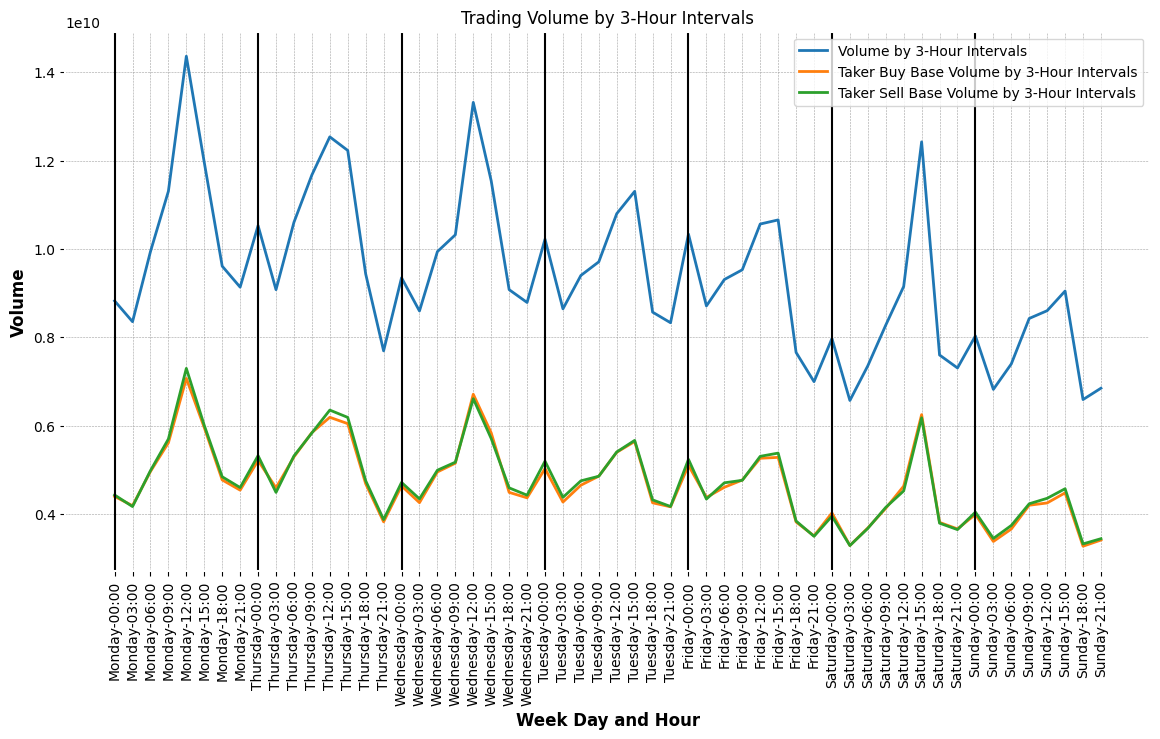

,timestamp,volume,day_of_week,hour,week_day_hour
0,2018-05-04 21:00:00,769885.14,4,21,04-21:00
1,2018-05-05 00:00:00,1808699.11,5,0,05-00:00
2,2018-05-05 03:00:00,1327272.26,5,3,05-03:00
3,2018-05-05 06:00:00,1603448.95,5,6,05-06:00
4,2018-05-05 09:00:00,2569290.86,5,9,05-09:00
...,...,...,...,...,...
11787,2022-05-17 06:00:00,39117567.00,1,6,01-06:00
11788,2022-05-17 09:00:00,37076246.00,1,9,01-09:00
11789,2022-05-17 12:00:00,56175894.00,1,12,01-12:00
11790,2022-05-17 15:00:00,49989664.00,1,15,01-15:00


In [75]:
# Resample the data to 6-hour intervals and sum the volume
volume_3h = ohlcv_df['volume'].resample('3H').sum()
taker_buy_base_volume_3h = ohlcv_df['taker_buy_base_volume'].resample('3H').sum()
taker_sell_base_volume_3h = volume_3h - taker_buy_base_volume_3h

# Convert the resampled data to a DataFrame for better readability
volume_3h_df = volume_3h.to_frame().reset_index()
taker_buy_base_volume_3h_df = taker_buy_base_volume_3h.to_frame().reset_index()
taker_sell_base_volume_3h = taker_sell_base_volume_3h.to_frame().reset_index()

# Add columns for day of the week and hour of the day
volume_3h_df['day_of_week'] = volume_3h_df['timestamp'].dt.dayofweek
volume_3h_df['hour'] = volume_3h_df['timestamp'].dt.hour
volume_3h_df['week_day_hour'] = volume_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + volume_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_volume_3h = volume_3h_df.groupby('week_day_hour')['volume'].sum()

taker_buy_base_volume_3h_df['day_of_week'] = taker_buy_base_volume_3h_df['timestamp'].dt.dayofweek
taker_buy_base_volume_3h_df['hour'] = taker_buy_base_volume_3h_df['timestamp'].dt.hour
taker_buy_base_volume_3h_df['week_day_hour'] = taker_buy_base_volume_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + taker_buy_base_volume_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_taker_buy_base_volume_3h = taker_buy_base_volume_3h_df.groupby('week_day_hour')['taker_buy_base_volume'].sum()

taker_sell_base_volume_3h['day_of_week'] = taker_sell_base_volume_3h['timestamp'].dt.dayofweek
taker_sell_base_volume_3h['hour'] = taker_sell_base_volume_3h['timestamp'].dt.hour
taker_sell_base_volume_3h['week_day_hour'] = taker_sell_base_volume_3h['day_of_week'].astype(str).str.zfill(2) + '-' + taker_sell_base_volume_3h['hour'].astype(str).str.zfill(2) + ':00'
grouped_taker_sell_base_volume_3h = taker_sell_base_volume_3h.groupby('week_day_hour')[0].sum()



day_map = {'00-': 'Monday-', '01-': 'Thursday-', '02-': 'Wednesday-', '03-': 'Tuesday-', '04-': 'Friday-', '05-': 'Saturday-', '06-': 'Sunday-'}
labels = list(grouped_volume_3h.index)
for day in day_map:
    labels = [label.replace(day, day_map[day]) for label in labels]

plt.figure(figsize=(14, 7))
plt.plot(grouped_volume_3h.index, grouped_volume_3h.values, label='Volume by 3-Hour Intervals')
plt.plot(grouped_taker_buy_base_volume_3h.index, grouped_taker_buy_base_volume_3h.values, label='Taker Buy Base Volume by 3-Hour Intervals')
plt.plot(grouped_taker_sell_base_volume_3h.index, grouped_taker_sell_base_volume_3h.values, label='Taker Sell Base Volume by 3-Hour Intervals')
plt.xlabel('Week Day and Hour')
plt.ylabel('Volume')
plt.title('Trading Volume by 3-Hour Intervals')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.xticks(rotation=90)
# Make a darker line every 8 ticks
for i in range(len(labels)):
    if i % 8 == 0:
        plt.axvline(x=i, color='black', linewidth=1.5)
plt.legend()
plt.show()
volume_3h_df

C:\Users\PLour\AppData\Local\Temp\ipykernel_4116\3972818416.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  close_3h = ohlcv_df['close'].resample('3H').sum()


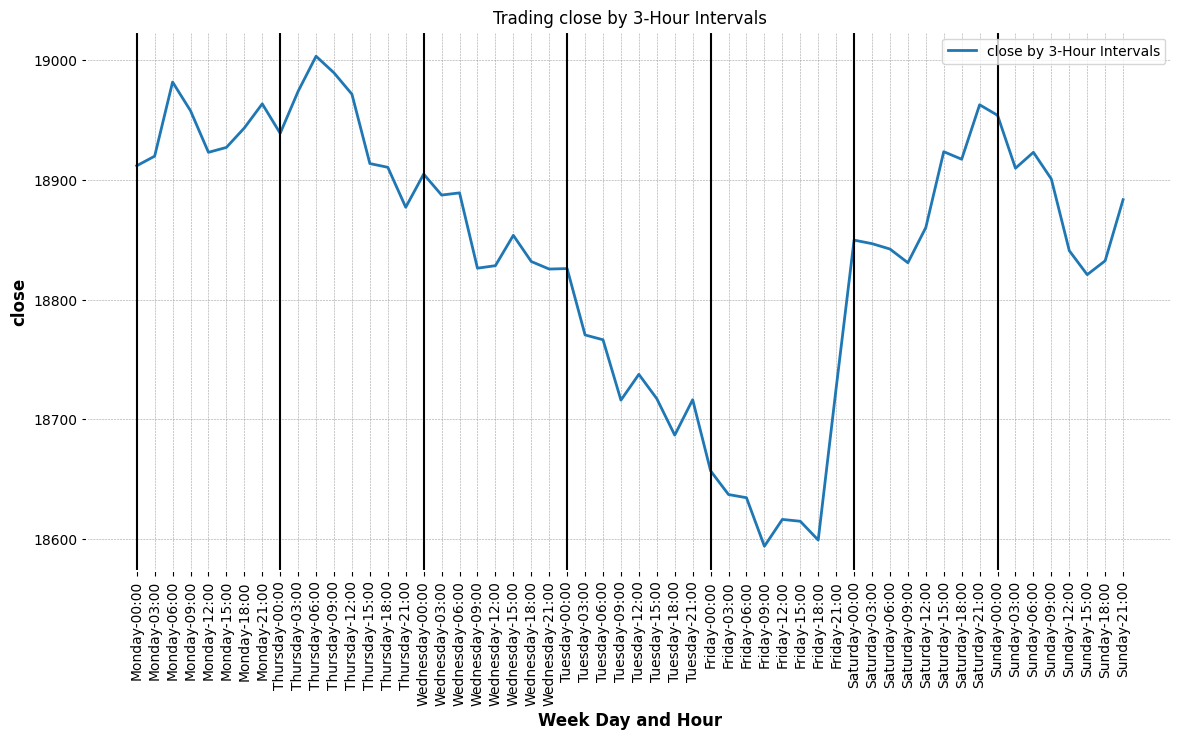

In [120]:
# Resample the data to 6-hour intervals and sum the close
close_3h = ohlcv_df['close'].resample('3H').sum()

# Convert the resampled data to a DataFrame for better readability
close_3h_df = close_3h.to_frame().reset_index()

# Add columns for day of the week and hour of the day
close_3h_df['day_of_week'] = close_3h_df['timestamp'].dt.dayofweek
close_3h_df['hour'] = close_3h_df['timestamp'].dt.hour
close_3h_df['week_day_hour'] = close_3h_df['day_of_week'].astype(str).str.zfill(2) + '-' + close_3h_df['hour'].astype(str).str.zfill(2) + ':00'  
grouped_close_3h = close_3h_df.groupby('week_day_hour')['close'].sum()


day_map = {'00-': 'Monday-', '01-': 'Thursday-', '02-': 'Wednesday-', '03-': 'Tuesday-', '04-': 'Friday-', '05-': 'Saturday-', '06-': 'Sunday-'}
labels = list(grouped_close_3h.index)
for day in day_map:
    labels = [label.replace(day, day_map[day]) for label in labels]

plt.figure(figsize=(14, 7))
plt.plot(grouped_close_3h.index, grouped_close_3h.values, label='close by 3-Hour Intervals')
plt.xlabel('Week Day and Hour')
plt.ylabel('close')
plt.title('Trading close by 3-Hour Intervals')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.xticks(rotation=90)
# Make a darker line every 8 ticks
for i in range(len(labels)):
    if i % 8 == 0:
        plt.axvline(x=i, color='black', linewidth=1.5)
plt.legend()
plt.show()


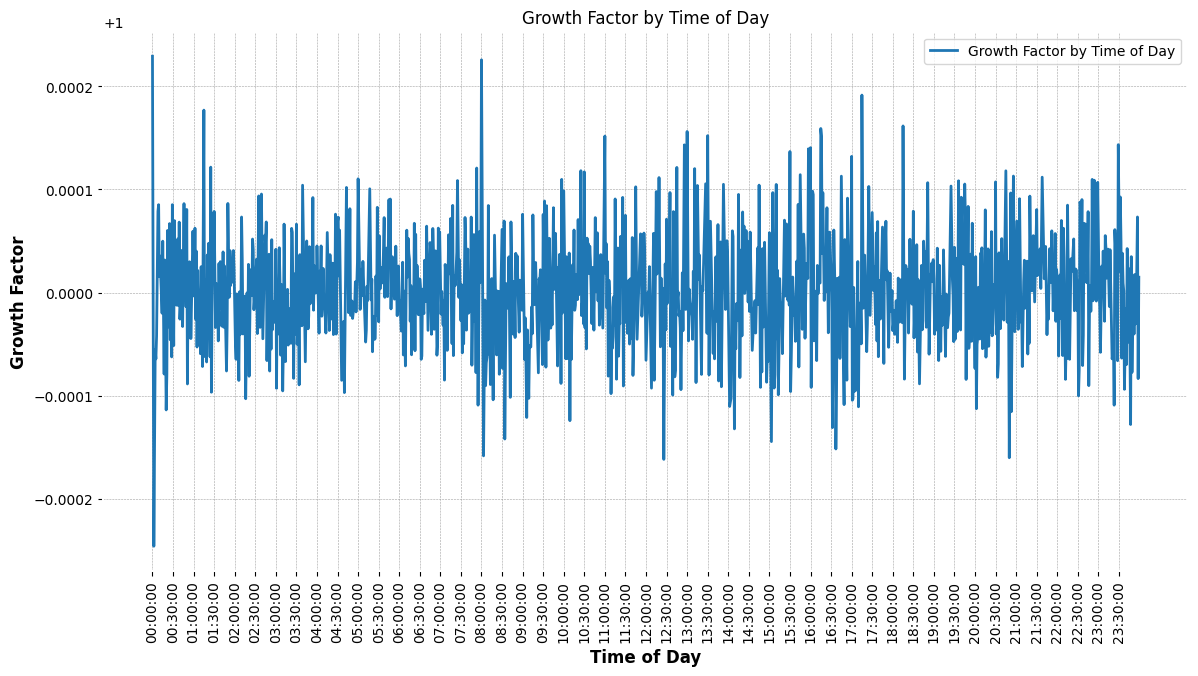

In [9]:
# Calculate the growth factor of the close value by minute
growth_factor_by_minute = ohlcv_df['close'].pct_change() + 1

# Aggregate the growth factor by minute per time of day
growth_factor_by_time_of_day = growth_factor_by_minute.groupby(ohlcv_df['time_of_day'].astype(str)).mean()

plt.figure(figsize=(14, 7))
plt.plot(growth_factor_by_time_of_day.index, growth_factor_by_time_of_day.values, label='Growth Factor by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Growth Factor')
plt.title('Growth Factor by Time of Day')
plt.xticks(rotation=90)
plt.xticks(ticks=range(0, len(growth_factor_by_time_of_day), 30), labels=growth_factor_by_time_of_day.index[::30], rotation=90)
plt.legend()
plt.show()


In [76]:
from statsmodels.tsa.stattools import adfuller

# Define the window size
window_size = 10000

# Initialize lists to store results
adf_statistics = []
p_values = []
critical_values = []

# Loop over the dataset in windows
for start in range(0, len(ohlcv_df), window_size):
    end = start + window_size
    window_data = ohlcv_df['close'][start:end]
    
    if len(window_data) < window_size:
        break
    
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(window_data)
    
    # Extract and store the test statistic and p-value
    adf_statistics.append(adf_result[0])
    p_values.append(adf_result[1])
    
    # Store the critical values
    critical_values.append(adf_result[4])

# Save the results in a file
results = {
    'Window': list(range(1, len(adf_statistics) + 1)),
    'ADF Statistic': adf_statistics,
    'p-value': p_values,
    'Critical Values': critical_values
}

results_df = pd.DataFrame(results)
results_df.to_csv('adf_test_results.csv', index=False)

# Check if the series is stationary based on the ADF test results
stationary_windows = results_df[results_df['p-value'] < 0.05]

print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


Number of stationary windows: 28
Percentage of stationary windows: 13.21%


In [124]:
from statsmodels.tsa.stattools import adfuller

# Define the window size
window_size = 10000

# Initialize lists to store results
adf_statistics = []
p_values = []
critical_values = []

# Loop over the dataset in windows
for start in range(0, len(ohlcv_df), window_size):
    end = start + window_size
    window_data = ohlcv_df['close'][start:end].diff()
    
    if len(window_data) < window_size:
        break
    
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(window_data)
    
    # Extract and store the test statistic and p-value
    adf_statistics.append(adf_result[0])
    p_values.append(adf_result[1])
    
    # Store the critical values
    critical_values.append(adf_result[4])

# Save the results in a file
results = {
    'Window': list(range(1, len(adf_statistics) + 1)),
    'ADF Statistic': adf_statistics,
    'p-value': p_values,
    'Critical Values': critical_values
}

results_df = pd.DataFrame(results)
results_df.to_csv('adf_test_results.csv', index=False)

# Check if the series is stationary based on the ADF test results
stationary_windows = results_df[results_df['p-value'] < 0.05]

print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


MissingDataError: exog contains inf or nans

In [123]:

# Define the window size
window_size = 10000

# Initialize lists to store results
adf_statistics = []
p_values = []
critical_values = []

# Loop over the dataset in windows
for start in range(0, len(ohlcv_df), window_size):
    end = start + window_size
    window_data = ohlcv_df['volume'][start:end]
    
    if len(window_data) < window_size:
        break
    
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(window_data)
    
    # Extract and store the test statistic and p-value
    adf_statistics.append(adf_result[0])
    p_values.append(adf_result[1])
    
    # Store the critical values
    critical_values.append(adf_result[4])

# Save the results in a file
results = {
    'Window': list(range(1, len(adf_statistics) + 1)),
    'ADF Statistic': adf_statistics,
    'p-value': p_values,
    'Critical Values': critical_values
}

results_df = pd.DataFrame(results)
results_df.to_csv('adf_volume_test_results.csv', index=False)

# Check if the series is stationary based on the ADF test results
stationary_windows = results_df[results_df['p-value'] < 0.05]

print(f'Number of windows: {len(results_df)}')
print(f"Number of stationary windows: {len(stationary_windows)}")
print(f'Percentage of stationary windows: {len(stationary_windows) / len(results_df) * 100:.2f}%')


Number of windows: 212
Number of stationary windows: 212
Percentage of stationary windows: 100.00%


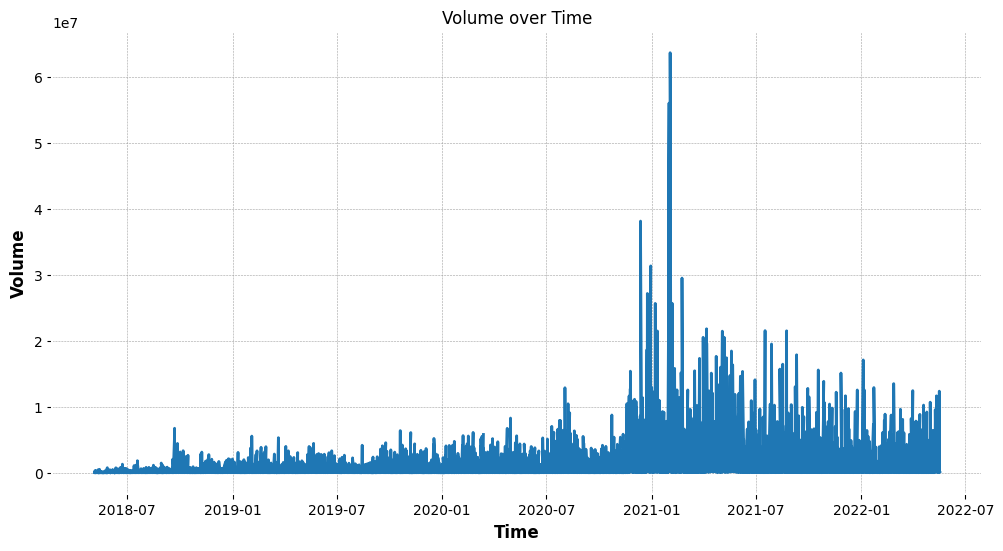

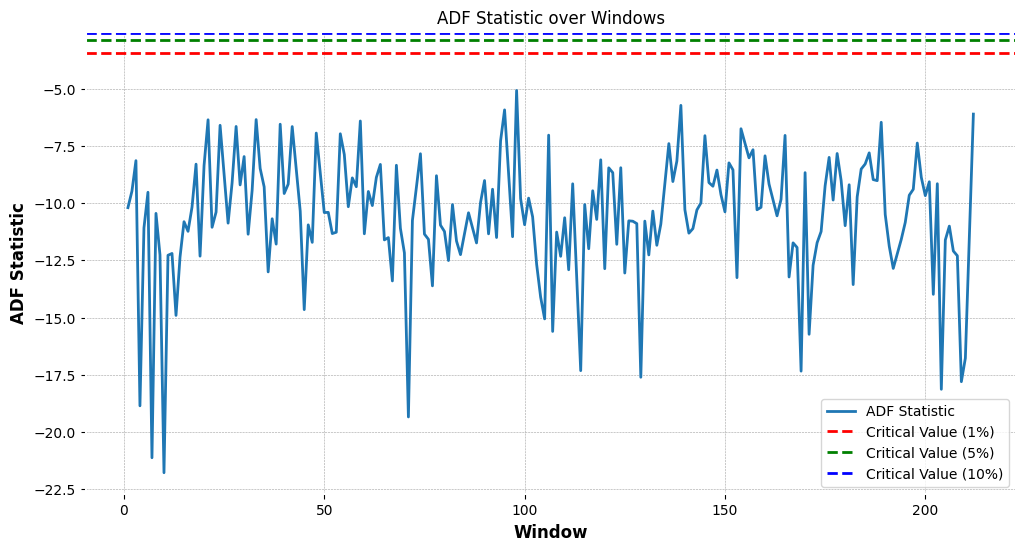

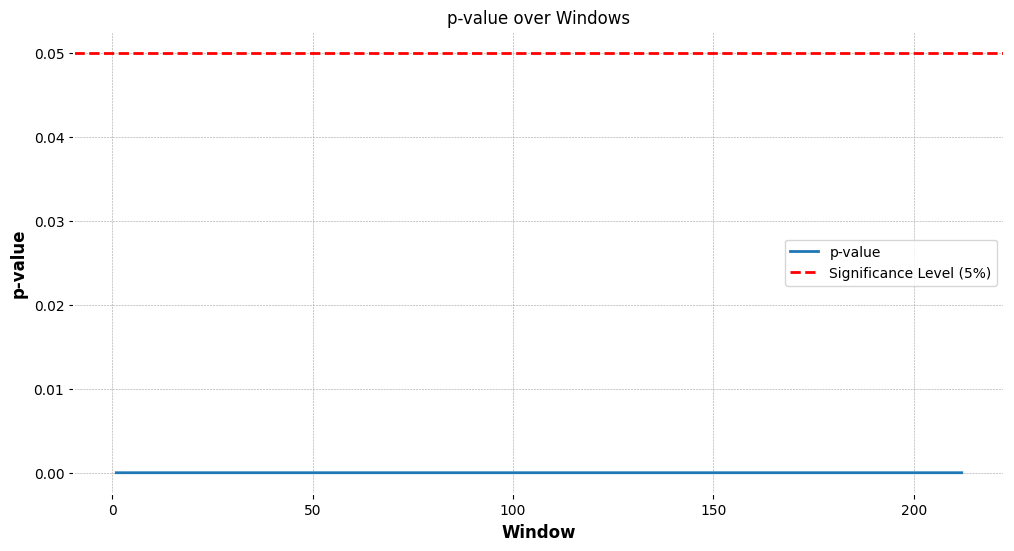

In [121]:
import matplotlib.pyplot as plt

# Plotar a série temporal completa
plt.figure(figsize=(12, 6))
plt.plot(ohlcv_df['volume'])
plt.title('Volume over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

# Plotar as estatísticas ADF para cada janela
plt.figure(figsize=(12, 6))
plt.plot(results_df['Window'], results_df['ADF Statistic'], label='ADF Statistic')
plt.axhline(y=-3.434, color='r', linestyle='--', label='Critical Value (1%)')
plt.axhline(y=-2.863, color='g', linestyle='--', label='Critical Value (5%)')
plt.axhline(y=-2.567, color='b', linestyle='--', label='Critical Value (10%)')
plt.title('ADF Statistic over Windows')
plt.xlabel('Window')
plt.ylabel('ADF Statistic')
plt.legend()
plt.show()

# Plotar os valores p para cada janela
plt.figure(figsize=(12, 6))
plt.plot(results_df['Window'], results_df['p-value'], label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (5%)')
plt.title('p-value over Windows')
plt.xlabel('Window')
plt.ylabel('p-value')
plt.legend()
plt.show()

In [11]:
# Shift the 'open' column by one to align it with the 'close' column
shifted_open = ohlcv_df['open'].shift(-1)

# Compare the 'close' column with the shifted 'open' column
comparison = ohlcv_df['close'] == shifted_open

print(f'{len(comparison[comparison == True]) / len(comparison) * 100}% of the time the close price is equal to the next day open price')

# Shift the 'close' column by one to get the next timestamp's closing price
shifted_close = ohlcv_df['close'].shift(-1)

# Compare the current 'close' column with the shifted 'close' column
comparison_next_close = ohlcv_df['close'] < shifted_close

# shows that the objective is to predict if the next timestaemp close price is higher than the current timestamp close price
equal_target_and_comparison = train_df['target'].values.astype(bool)[:-1] == comparison_next_close.values[:-1]
print(f'{len(equal_target_and_comparison[equal_target_and_comparison == True]) / len(equal_target_and_comparison) * 100}% of the time the target is equal to the next day close price')

30.83995857593956% of the time the close price is equal to the next day open price
100.0% of the time the target is equal to the next day close price


In [ ]:
submission_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)
submission_df